<a href="https://colab.research.google.com/github/sabrinacouto/CRISP-DM/blob/main/checkpoint02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CheckPoint 02 - IA & ChatBot**
**Integrantes:**
*   Juliana Moreira - RM: 554113
*   Kevin Nobre - RM: 552590
*   Sabrina Couto - RM: 552728






**Introdução**

---




Este é um projeto realizado para a graduação de Análise e Desenvolvimento de Sistemas na FIAP. Neste projeto, vamos analisar os dados seguindo o processo CRISP-DM.


---

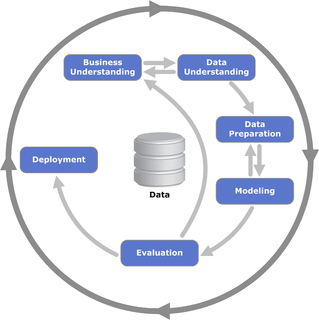



**CRISP-DM (Cross-Industry Standard Process for Data Mining)**

*  Business Understanding (Entendimento do Negócio)
*  Data Understanding (Entendimento dos Dados)
*  Data Preparation (Preparação dos Dados)
*  Modeling (Modelagem )
*  Evaluation (Avaliação)
*  Deployment (Implementação)


Neste projeto, faremos até a etapa Evaluation.



---


**Sobre o Dataset**
*   Origem - Kaggle (https://www.kaggle.com/datasets/venky73/spam-mails-dataset)
*   Nome: Spam Mails Dataset
*   Descrição: Este conjunto de dados contém e-mails rotulados como spam ou não spam


## 1. Business Understanding







 **Objetivo do Projeto:**

O objetivo principal é desenvolver um modelo de classificação de e-mails que seja capaz de distinguir entre e-mails legítimos (não spam) e e-mails indesejados (spam). Esse modelo será utilizado para melhorar a eficácia da filtragem de e-mails em clientes de e-mail ou sistemas de segurança de e-mail corporativo.

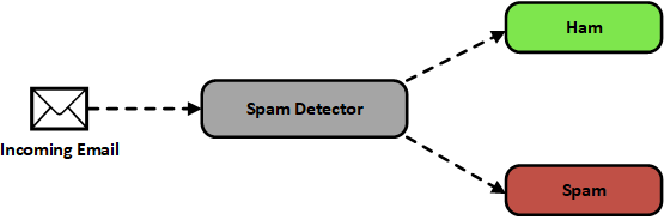

Com o aumento do volume de e-mails recebidos diariamente, a identificação eficaz de e-mails spam se tornou uma necessidade para quem utiliza e-mail em seu dia a dia. E-mails spam podem conter phishing, malware, fraudes ou conteúdo indesejado, representando riscos de segurança e prejudicando a produtividade do usuário.



----------------------


## 2. Data Understanding


Neste tópico, iremos fazer algumas visualizações para entender as características dos dados.

Para isso, primeiro vamos importar o nosso conjunto de dados e algumas das bibliotecas necessárias.







In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


dados = pd.read_csv('spam_ham_dataset.csv')

Agora, vamos visualizar as 5 primeiras linhas e colunas do nosso conjunto de dados.



In [ ]:
dados.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


Podemos ver que o conjunto de dados do nosso dataset possui as seguintes colunas:

* ***Unnamed: 0:*** Esta coluna é um identificador único para cada registro no conjunto de dados. Mais tarde iremos renomeá-la.

* ***label:*** Esta coluna indica se o e-mail é classificado como "ham" (não spam) ou"spam". Esta é a variável de destino que queremos prever em uma análise de classificação.

* ***text:*** Esta coluna contém o texto do e-mail.

* ***label_num:*** Esta coluna é uma codificação numérica da variável "label", onde "0" representa "ham" e "1" representa "spam"



---



Estilizando o conjunto de dados

In [ ]:
style = dados.head().style

style.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#4682B4"), ('font-weight', 'bold')]}
])

,Unnamed: 0,label,text,label_num
0,605,ham,"Subject: enron methanol ; meter # : 988291 this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary flow data provided by daren } . please override pop ' s daily volume { presently zero } to reflect daily activity you can obtain from gas control . this change is needed asap for economics purposes .",0
1,2349,ham,"Subject: hpl nom for january 9 , 2001 ( see attached file : hplnol 09 . xls ) - hplnol 09 . xls",0
2,3624,ham,"Subject: neon retreat ho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time ! i know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute . on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about . i think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a potential alternative for how we can get together on that weekend , and then you can let me know which you prefer . the first option would be to have a retreat similar to what we ' ve done the past several years . this year we could go to the heartland country inn ( www . . com ) outside of brenham . it ' s a nice place , where we ' d have a 13 - bedroom and a 5 - bedroom house side by side . it ' s in the country , real relaxing , but also close to brenham and only about one hour and 15 minutes from here . we can golf , shop in the antique and craft stores in brenham , eat dinner together at the ranch , and spend time with each other . we ' d meet on saturday , and then return on sunday morning , just like what we ' ve done in the past . the second option would be to stay here in houston , have dinner together at a nice restaurant , and then have dessert and a time for visiting and recharging at one of our homes on that saturday evening . this might be easier , but the trade off would be that we wouldn ' t have as much time together . i ' ll let you decide . email me back with what would be your preference , and of course if you ' re available on that weekend . the democratic process will prevail - - majority vote will rule ! let me hear from you as soon as possible , preferably by the end of the weekend . and if the vote doesn ' t go your way , no complaining allowed ( like i tend to do ! ) have a great weekend , great golf , great fishing , great shopping , or whatever makes you happy ! bobby",0
3,4685,spam,"Subject: photoshop , windows , office . cheap . main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin",1
4,2030,ham,"Subject: re : indian springs this deal is to book the teco pvr revenue . it is my understanding that teco just sends us a check , i haven ' t received an answer as to whether there is a predermined price associated with this deal or if teco just lets us know what we are giving . i can continue to chase this deal down if you need .",0




---



Aqui vamos ver informações mais detalhadas sobre nosso dataset. Essa função nos permite identifcar o número total de entradas (linhas) no conjunto de dados, o número de colunas e seus nomes, o tipo de dados em cada coluna (o que nos ajuda a entender como interpretar os valores presentes nas diferentes variáveis), a quantidade de memória utilizada pelo DataFrame e entre outras informações.





In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


Sumário estatístico para variáveis numéricas:

In [ ]:
dados.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


Verificando se existem campos nulos

In [ ]:
num_nulos= dados.isnull().sum()

print("Número de valores nulos em cada coluna:")
print(num_nulos)

Número de valores nulos em cada coluna:
Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


Contagem de valores na coluna categórica do dataset:

In [ ]:
dados['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

Agora com essas informações, vamos fazer uma análise estatistica. Vamos visualizar a porcentagem de e-mails não-spam (ham) e e-mails que são spams.



In [ ]:
# Calcular contagem de cada classe
values = dados['label_num'].value_counts()
total = values.sum()

# Calcular porcentagens
percentage_0 = (values[0] / total) * 100
percentage_1 = (values[1] / total) * 100

# Imprimir resultados
print('Porcentagem de 0 (não spam):', percentage_0)
print('Porcentagem de 1 (spam):', percentage_1)


Porcentagem de 0 (não spam): 71.01140978534133
Porcentagem de 1 (spam): 28.98859021465867


Porcentagem de 0 (não spam): 71.01140978534133
Porcentagem de 1 (spam): 28.98859021465867


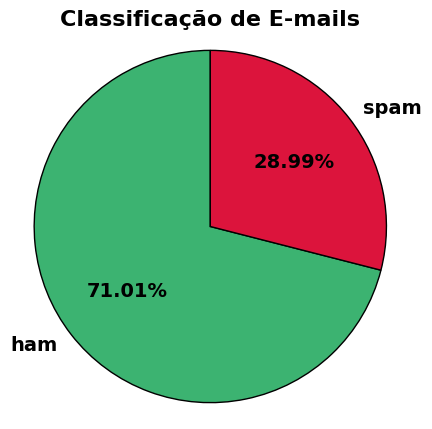

In [ ]:
# Calcular contagem de cada classe
values = dados['label_num'].value_counts()

# Calcular porcentagens
total = values.sum()
percentage_0 = (values[0] / total) * 100
percentage_1 = (values[1] / total) * 100

# Imprimir resultados
print('Porcentagem de 0 (não spam):', percentage_0)
print('Porcentagem de 1 (spam):', percentage_1)

# Define cores personalizadas
colors = ['#3CB371', '#DC143C']

fig, ax = plt.subplots(figsize=(5, 5))

# Criar o gráfico de pizza
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

# Personalizar propriedades do texto
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

ax.set_title('Classificação de E-mails', fontsize=16, fontweight='bold')

ax.axis('equal')

plt.show()



----------------------


## 3. Data Preparation



Nesta etapa vamos preparar os nossos dados. Como analisamos no tópico acima, o conjunto de dados não possui valores nulos, logo não se faz necessário tratá-los.


Removendo a coluna que não será utilizada no modelo.

In [ ]:
dados.drop(columns = ['Unnamed: 0'], inplace = True)

Aqui vamos fazer um pré-processamento de texto, tornando-o mais adequado para a modelagem de dados.

In [ ]:
import re

def clean_text(text):
    if isinstance(text, str):  # Verifica se o texto é uma string
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'\S+@\S+', '', text)
        text = re.sub(r'http\S+', '', text)
        text = text.lower()
        words = text.split()

        stopwords_list = ['the', 'a', 'an', 'and', 'or', 'but', 'if', 'then', 'that', 'this', 'is', 'to']
        words = [word for word in words if word not in stopwords_list]

        clean_text = ' '.join(words)
        return clean_text
    else:
        return ''

dados['text'] = dados['text'].apply(clean_text)
print(dados.head())

  label                                               text  label_num
0   ham  subject enron methanol meter follow up note i ...          0
1   ham  subject hpl nom for january see attached file ...          0
2   ham  subject neon retreat ho ho ho we re around mos...          0
3  spam  subject photoshop windows office cheap main tr...          1
4   ham  subject re indian springs deal book teco pvr r...          0


Preparando um conjunto de dados de texto para a classificação, convertendo-o em uma representação numérica.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(max_features = 3000)

In [ ]:
X = dados['text'].values
y = dados['label_num'].values

# Inicializar o vetorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Ajustar e transformar os dados de texto
X_tfidf = tfidf_vectorizer.fit_transform(X)


Dividindo os dados em conjuntos de treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

# Dividindo os dados em conjuntos de treinamento e teste, garantindo que a distribuição das classes seja mantida
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=8)


----------------------


## 4. Modeling

### **Treinando o modelo**



*  Treinando o modelo com Random Forest para a classificação




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


model = RandomForestClassifier(n_estimators=100, random_state=10)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


----------------------


## 5. Evaluation

Aqui vamos checar a precisão e acurácia do nosso modelo, nesta etapa saberemos se nosso modelo sabe classificar o que é spam corretamente.

Acurácia: 0.978743961352657
Precisão: 0.964516129032258
Recall: 0.964516129032258
F1-score: 0.964516129032258
Matriz de Confusão:
[[714  11]
 [ 11 299]]


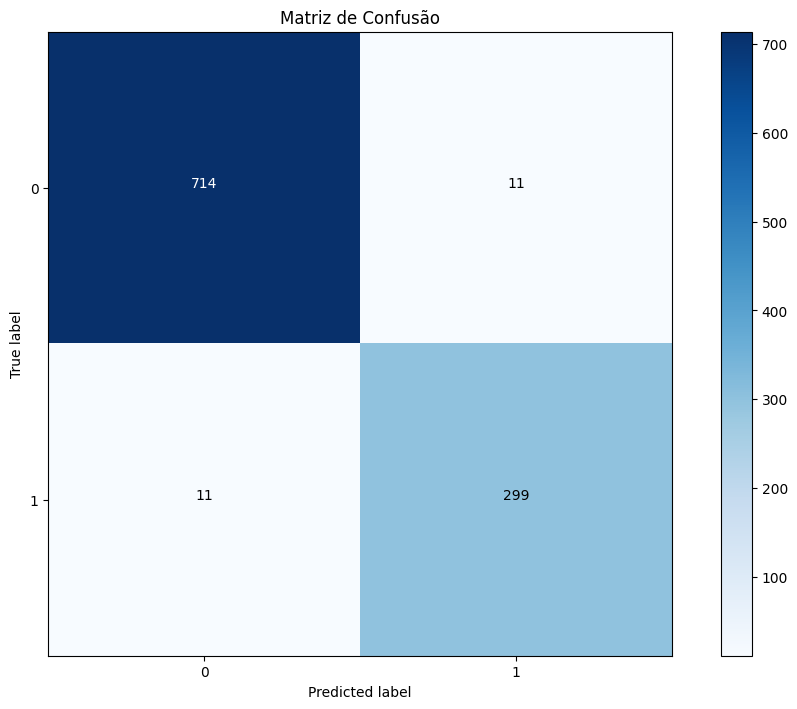

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f'Acurácia: {accuracy}')
    print(f'Precisão: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')

    conf_matrix = confusion_matrix(y_true, y_pred)
    print('Matriz de Confusão:')
    print(conf_matrix)

    # Visualizando a Matriz de Confusão como uma imagem
    plt.figure(figsize=(10, 7))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusão')
    plt.colorbar()

    true_labels = np.unique(y_true)
    predicted_labels = np.unique(y_pred)

    tick_marks = np.arange(len(true_labels))
    plt.xticks(tick_marks, true_labels, rotation=0)
    plt.yticks(tick_marks, predicted_labels)

    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, str(conf_matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


evaluate_model(y_test, y_pred)



----------------------


## Conclusão

Fizemos todas as etapas do processo CRISP-DM, com exceção da etapa Deployment. Demonstramos nosso objetivo, analisamos, preparamos, treinamos e avaliamos nosso conjunto de dados.

Por fim, o modelo demonstrou um desempenho satisfatório ao ter *97%* de acurácia e precisão de *96%* para classificar e-mails não spams e e-mails spams. Deste modo, atendeu os requisitos necessários para cumprir nosso objetivo de projeto.